### **ML Assignment- Mayank Gupta (CSE-2 230553)**

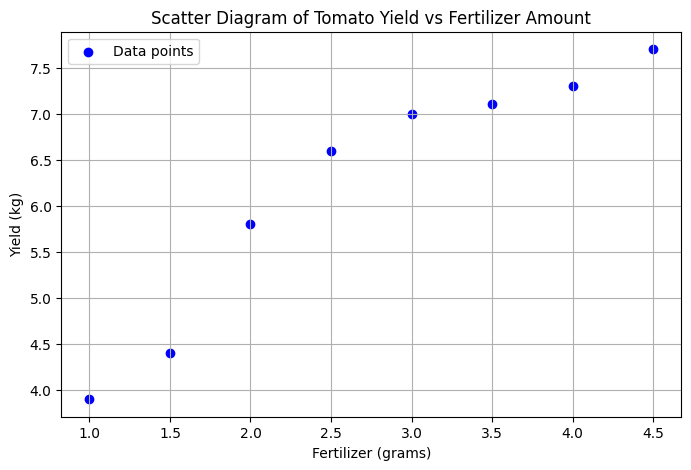

In [ ]:
#Q1
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])  # Fertilizer (grams)
y = np.array([3.9, 4.4, 5.8, 6.6, 7.0, 7.1, 7.3, 7.7])  # Yield (kg)

# Q1 (a) Scatter diagram
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data points')
plt.title('Scatter Diagram of Tomato Yield vs Fertilizer Amount')
plt.xlabel('Fertilizer (grams)')
plt.ylabel('Yield (kg)')
plt.grid(True)
plt.legend()
plt.show()


(b) Regression line equation: y = 3.25 + 1.08x


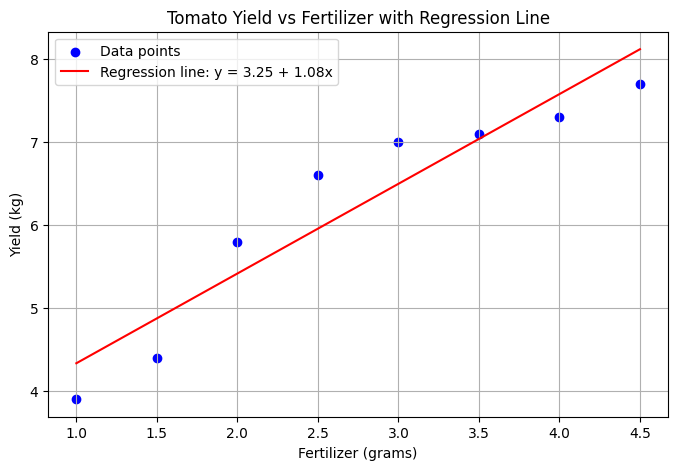

In [ ]:
# Q1 (b) Least squares regression line
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
a = (sum_y - b * sum_x) / n

print(f"\n(b) Regression line equation: y = {a:.2f} + {b:.2f}x")

# Plot with regression line
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, a + b * x, color='red', label=f'Regression line: y = {a:.2f} + {b:.2f}x')
plt.title('Tomato Yield vs Fertilizer with Regression Line')
plt.xlabel('Fertilizer (grams)')
plt.ylabel('Yield (kg)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Q1 (c) Estimate yield for 3.2 grams
x_new = 3.2
y_pred = a + b * x_new
print(f"\n(c) Estimated yield for {x_new} grams: {y_pred:.2f} kg")


(c) Estimated yield for 3.2 grams: 6.71 kg


In [ ]:
# Q1 (d) Indicate why it may not be appropriate to use the equation for 20 grams of fertilizer
print("\nIt may not be appropriate to use this linear regression equation to predict the yield for a plant treated weekly with 20 grams of fertilizer because:")
print("- **Extrapolation:** 20 grams is far outside the range of the observed fertilizer amounts (1.0 to 4.5 grams). The linear relationship observed within our data range might not hold true for such extreme values.")
print("- **Non-linear Relationship:** The relationship between fertilizer and yield might not be linear across all possible fertilizer amounts. There could be diminishing returns at higher levels, or even toxic effects that our linear model doesn't account for.")
print("- **Other Limiting Factors:** At very high fertilizer levels, other factors like water, sunlight, or other nutrients might become the limiting factors for growth, and adding more of this specific fertilizer won't necessarily increase the yield.")


It may not be appropriate to use this linear regression equation to predict the yield for a plant treated weekly with 20 grams of fertilizer because:
- **Extrapolation:** 20 grams is far outside the range of the observed fertilizer amounts (1.0 to 4.5 grams). The linear relationship observed within our data range might not hold true for such extreme values.
- **Non-linear Relationship:** The relationship between fertilizer and yield might not be linear across all possible fertilizer amounts. There could be diminishing returns at higher levels, or even toxic effects that our linear model doesn't account for.
- **Other Limiting Factors:** At very high fertilizer levels, other factors like water, sunlight, or other nutrients might become the limiting factors for growth, and adding more of this specific fertilizer won't necessarily increase the yield.


In [7]:
#Q2)
# Load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Feature selection and preprocessing
def preprocess_data(df):
    # Select features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    X = df[features]
    y = df['Survived'] if 'Survived' in df else None

    return X, y

X, y = preprocess_data(train_data)

In [9]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create preprocessing pipeline
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [11]:
#Q2)i) Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train logistic regression model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(X_train, y_train)

# Make predictions
lr_preds = lr_pipeline.predict(X_val)

# Evaluate performance
lr_accuracy = accuracy_score(y_val, lr_preds)
lr_precision = precision_score(y_val, lr_preds)
lr_recall = recall_score(y_val, lr_preds)
lr_f1 = f1_score(y_val, lr_preds)

print("Logistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_val, lr_preds))

Logistic Regression Performance:
Accuracy: 0.7989
Precision: 0.7794
Recall: 0.7162
F1 Score: 0.7465
Confusion Matrix:
[[90 15]
 [21 53]]


In [13]:
#Q2)ii) K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create and train KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))])

knn_pipeline.fit(X_train, y_train)

# Make predictions
knn_preds = knn_pipeline.predict(X_val)

# Evaluate performance
knn_accuracy = accuracy_score(y_val, knn_preds)
knn_precision = precision_score(y_val, knn_preds)
knn_recall = recall_score(y_val, knn_preds)
knn_f1 = f1_score(y_val, knn_preds)

print("\nK-Nearest Neighbors Performance:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_val, knn_preds))


K-Nearest Neighbors Performance:
Accuracy: 0.8156
Precision: 0.8060
Recall: 0.7297
F1 Score: 0.7660
Confusion Matrix:
[[92 13]
 [20 54]]



Model Comparison:
      Metric  Logistic Regression  K-Nearest Neighbors
0   Accuracy             0.798883             0.815642
1  Precision             0.779412             0.805970
2     Recall             0.716216             0.729730
3   F1 Score             0.746479             0.765957


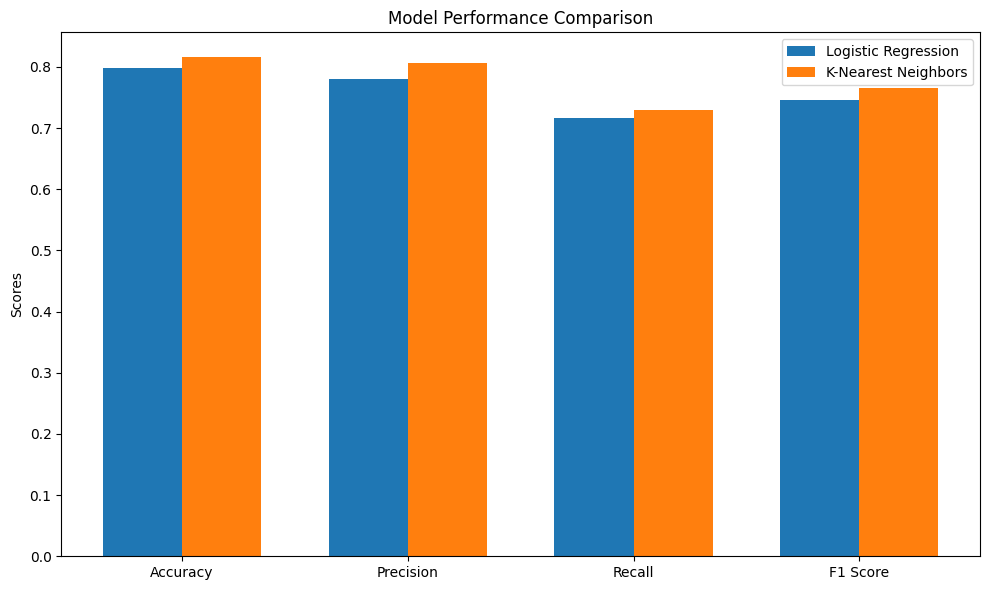

In [14]:
import matplotlib.pyplot as plt

# Create comparison table
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]

comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': lr_scores,
    'K-Nearest Neighbors': knn_scores
})

print("\nModel Comparison:")
print(comparison_df)

# Visual comparison
x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], lr_scores, width, label='Logistic Regression')
rects2 = ax.bar([i + width/2 for i in x], knn_scores, width, label='K-Nearest Neighbors')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

In [36]:
#Q3)House Price Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
train_data_house = pd.read_csv('train_house.csv')
test_data_house = pd.read_csv('test_house.csv')


# Load the dataset with updated variable names
train_data_house = pd.read_csv('train_house.csv')
test_data_house = pd.read_csv('test_house.csv')

train_data_house.head()
# train_data_house.info()
# print("\nMissing values:\n", train_data_house.isnull().sum().sort_values(ascending=False).head(20))


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
# Separate features and target
X = train_data_house.drop('SalePrice', axis=1)
y = train_data_house['SalePrice']


In [28]:
X.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# Fill missing values
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    X[col].fillna('None', inplace=True)

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    X[col].fillna(0, inplace=True)

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    X[col].fillna(0, inplace=True)

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    X[col].fillna('None', inplace=True)

X['MasVnrType'].fillna('None', inplace=True)
X['MasVnrArea'].fillna(0, inplace=True)
X['Electrical'].fillna(X['Electrical'].mode()[0], inplace=True)
X['LotFrontage'].fillna(X['LotFrontage'].median(), inplace=True)

<ipython-input-28-3322d03b425c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna('None', inplace=True)
<ipython-input-28-3322d03b425c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [29]:
# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

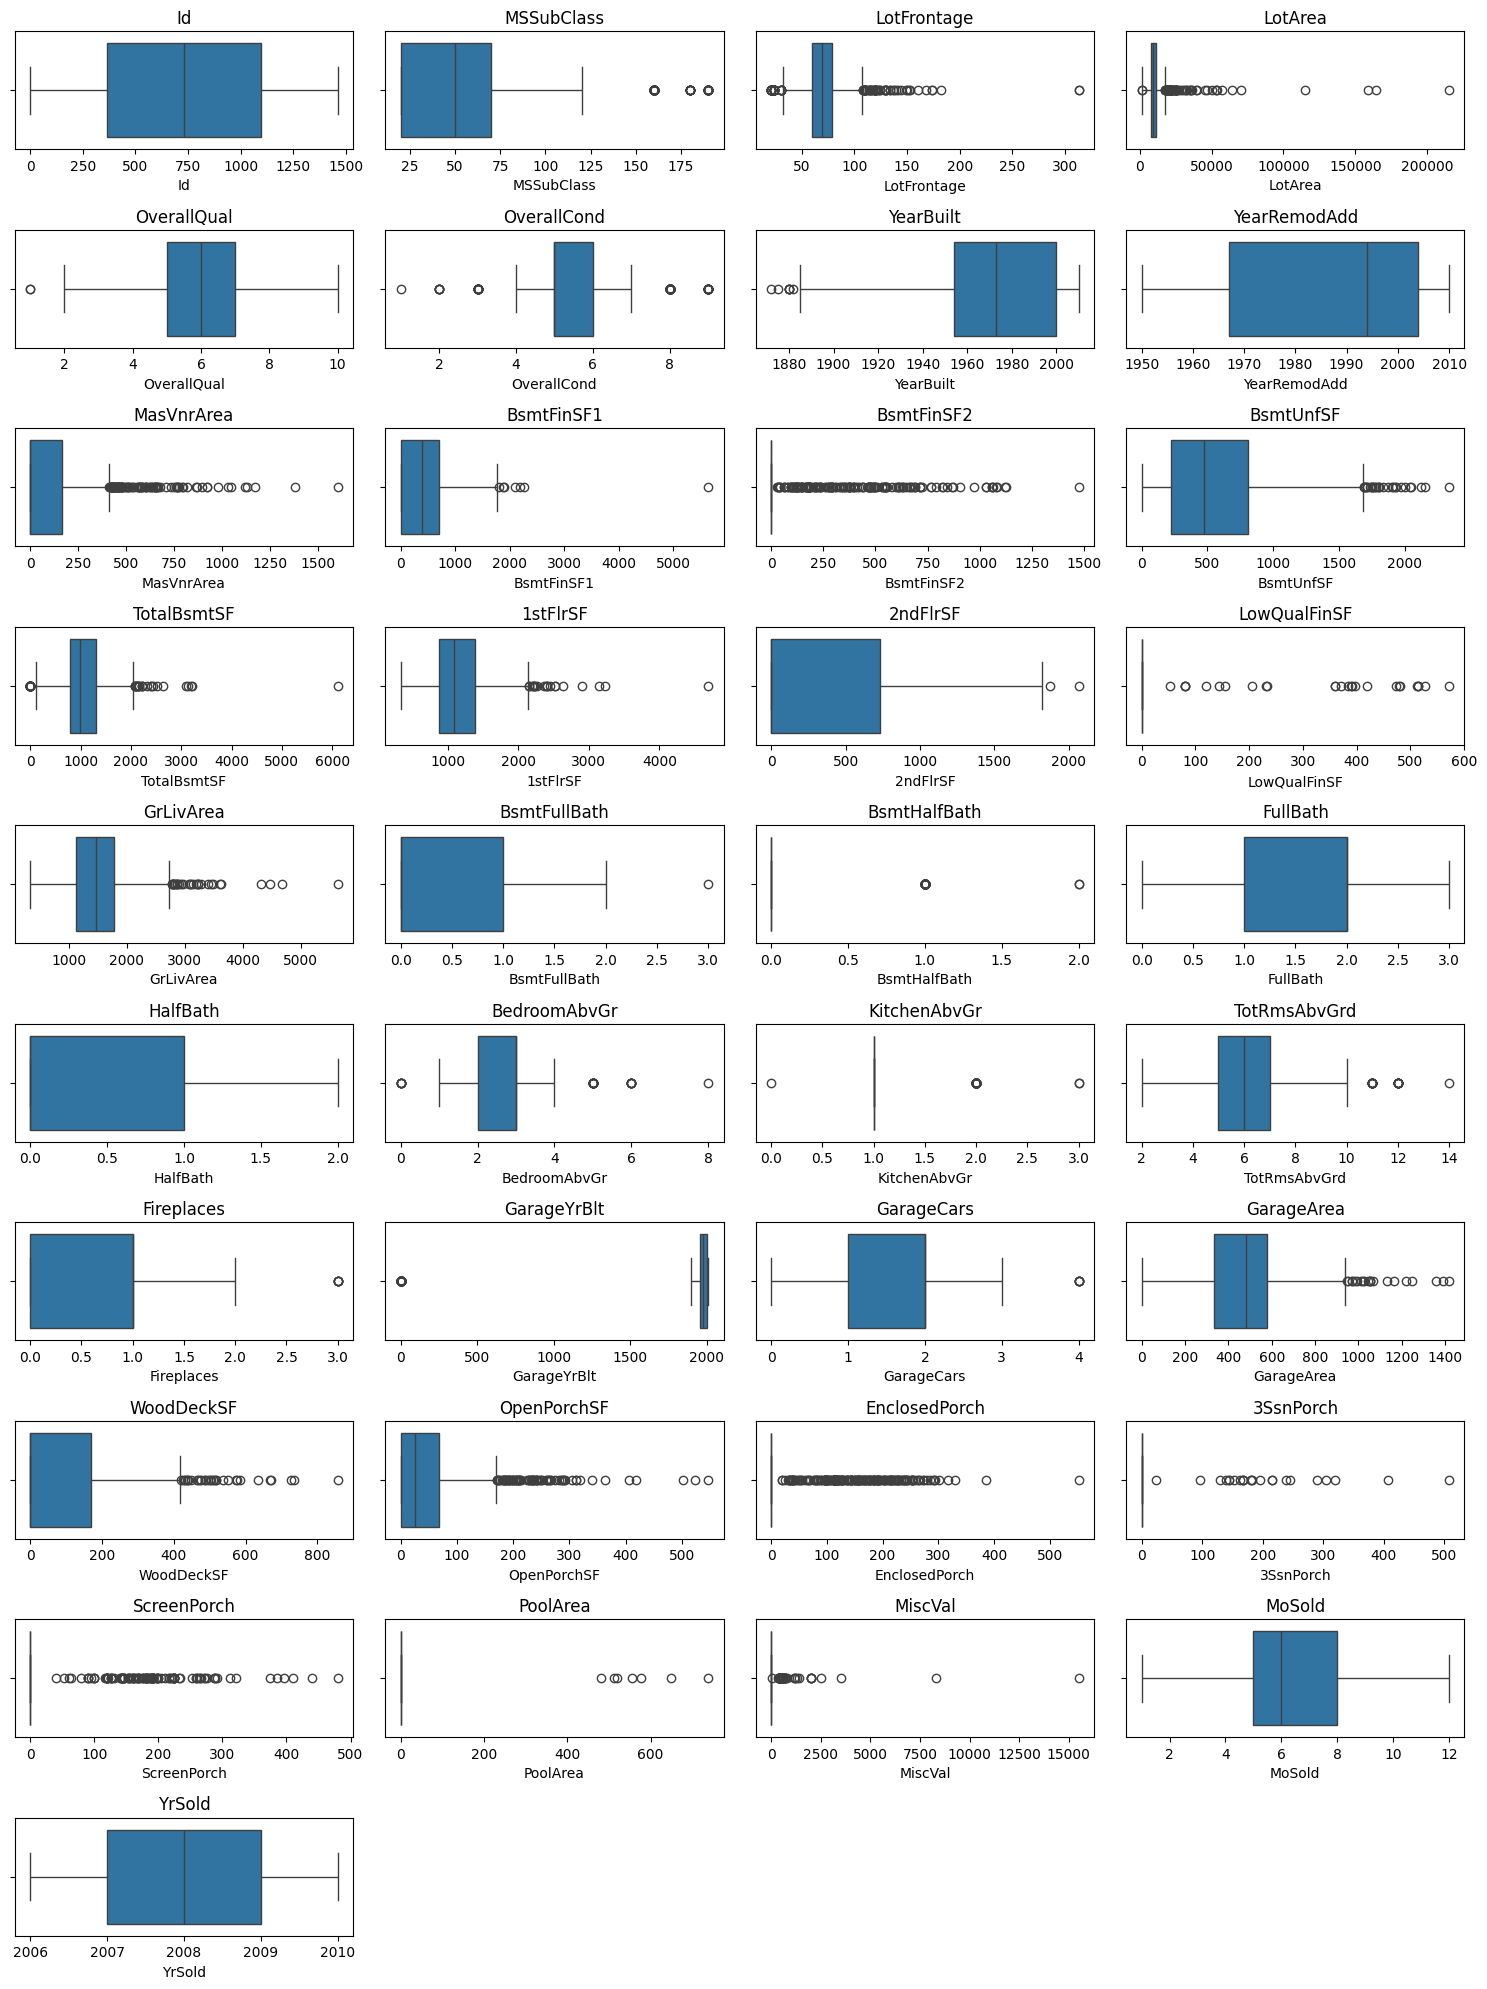

In [30]:
# Visualize outliers in numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(10, 4, i+1)
    sns.boxplot(x=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
# outlier removal
def remove_outliers(df, numerical_cols, target_col):
    # Combine numerical features and target column
    cols_to_check = numerical_cols + [target_col]

    # Filter to only include columns that exist in the DataFrame
    cols_to_check = [col for col in cols_to_check if col in df.columns]

    # Remove outliers for each column
    for col in cols_to_check:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Verify target column name
print("Columns in X:", X.columns.tolist())
print("Target variable name:", y.name)

target_column = y.name  # This gets the name of your target series
X_clean = remove_outliers(X.join(y), num_cols, target_column)

# Split back into features and target
X = X_clean.drop(target_column, axis=1)
y = X_clean[target_column]

Columns in X: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Ne

In [40]:
### Feature Scaling and Multicollinearity Check
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multicollinearity
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_results = calculate_vif(X.select_dtypes(include=['int64', 'float64']))
print(vif_results.head(10))

# Remove high VIF features
high_vif_features = vif_results[vif_results['VIF'] > 10]['feature'].tolist()
X.drop(high_vif_features, axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=['int64', 'float64'])),
                       columns=X.select_dtypes(include=['int64', 'float64']).columns)
X[X_scaled.columns] = X_scaled

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         feature           VIF
16     GrLivArea           inf
9     BsmtFinSF1           inf
10    BsmtFinSF2           inf
11     BsmtUnfSF           inf
12   TotalBsmtSF           inf
14      2ndFlrSF           inf
15  LowQualFinSF           inf
13      1stFlrSF           inf
36        YrSold  2.213583e+04
7   YearRemodAdd  2.110741e+04


In [43]:
# i) Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate
lr_pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("\nLinear Regression Performance:")
print(f"R-squared: {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.4f}")

# Cross-validation
lr_cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {np.mean(lr_cv_scores):.4f} (±{np.std(lr_cv_scores):.4f})")

# Feature importance
lr_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
lr_coef = lr_coef.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nTop 10 Important Features:")
print(lr_coef.head(10))



Linear Regression Performance:
R-squared: 0.7319
RMSE: 45346.2652
Cross-validated R-squared: 0.7233 (±0.0750)

Top 10 Important Features:
              Feature    Coefficient
91     RoofMatl_Metal  460642.553636
95   RoofMatl_WdShngl  428330.673800
93   RoofMatl_Tar&Grv  410973.135894
94   RoofMatl_WdShake  399704.912856
89   RoofMatl_CompShg  395248.835882
92      RoofMatl_Roll  380729.278758
196     GarageQual_Fa -195087.691423
204     GarageCond_Po  190893.080261
199     GarageQual_Po -190319.173053
205     GarageCond_TA  184590.519109


In [44]:
# ii) K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'n_neighbors': range(3, 15),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_
print("\nBest KNN Parameters:", grid_search.best_params_)

# Evaluate
knn_pred = best_knn.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))

print("\nKNN Regressor Performance:")
print(f"R-squared: {knn_r2:.4f}")
print(f"RMSE: {knn_rmse:.4f}")

# Cross-validation
knn_cv_scores = cross_val_score(best_knn, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {np.mean(knn_cv_scores):.4f} (±{np.std(knn_cv_scores):.4f})")



Best KNN Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

KNN Regressor Performance:
R-squared: 0.7670
RMSE: 42277.1220
Cross-validated R-squared: 0.7281 (±0.0428)



Model Comparison:
               Model  R-squared          RMSE  CV R-squared
0  Linear Regression   0.731917  45346.265229      0.723308
1      KNN Regressor   0.766978  42277.122030      0.728128


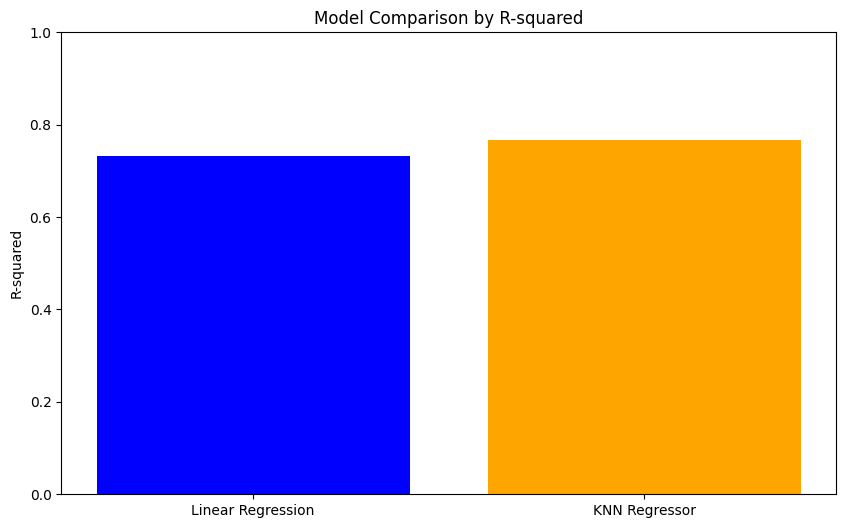

In [45]:
# Step 4: Model Comparison and Results Analysis
# Create comparison table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor'],
    'R-squared': [lr_r2, knn_r2],
    'RMSE': [lr_rmse, knn_rmse],
    'CV R-squared': [np.mean(lr_cv_scores), np.mean(knn_cv_scores)]
})

print("\nModel Comparison:")
print(results)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['R-squared'], color=['blue', 'orange'])
plt.title('Model Comparison by R-squared')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.show()

Dataset shape: (1000, 50)
Class distribution: [499 501]


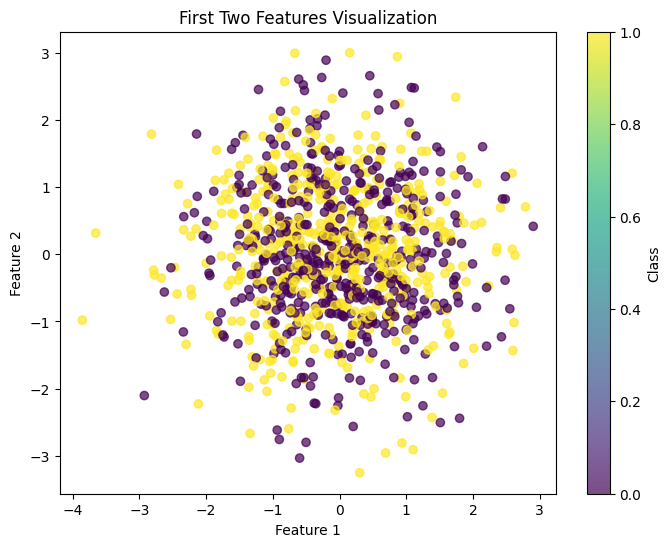

In [46]:
#Q4
# Data Generation and Initial Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=50,
    n_informative=10,
    n_redundant=10,
    n_classes=2,
    class_sep=1.5,
    random_state=42
)

# Initial EDA
print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")

# Visualize first two features
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('First Two Features Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

In [47]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify standardization
print(f"Mean after scaling: {np.mean(X_scaled, axis=0)[:5]}")  # Should be ~0
print(f"Std after scaling: {np.std(X_scaled, axis=0)[:5]}")    # Should be ~1

Mean after scaling: [-5.68434189e-17  2.62567745e-17 -8.92619312e-17 -3.03312930e-16
  2.13162821e-17]
Std after scaling: [1. 1. 1. 1. 1.]


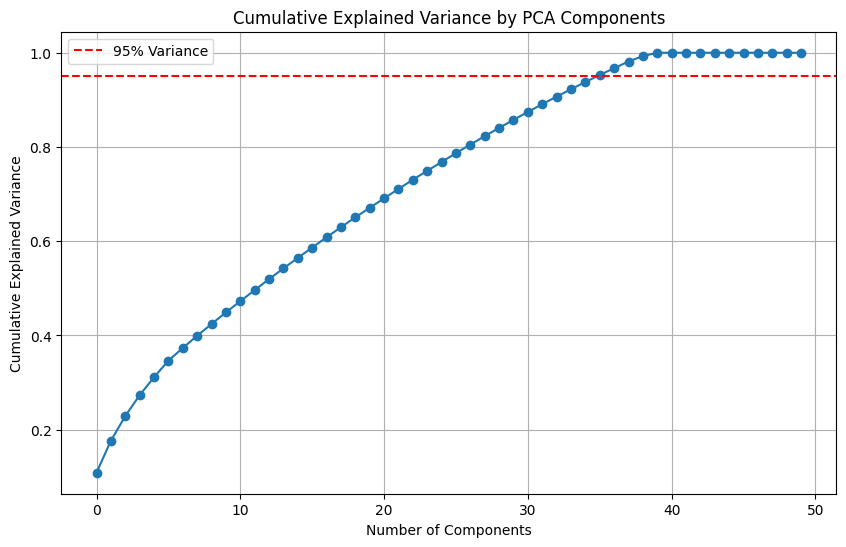

Number of components for 95% variance: 36


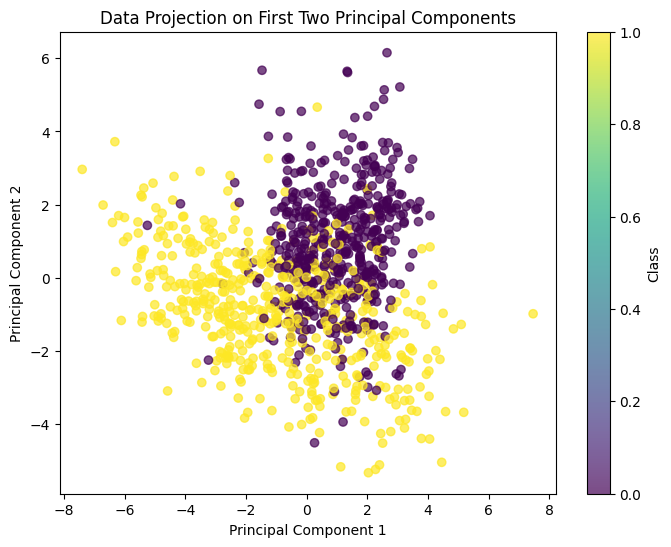

In [48]:
#Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

# Apply PCA without dimensionality reduction first
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

# Find number of components for 95% variance
n_components = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components}")

# Apply PCA with selected components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualize data in 2D PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Data Projection on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

In [49]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Split original and PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Linear SVM without PCA:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       104
           1       0.86      0.97      0.91        96

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200



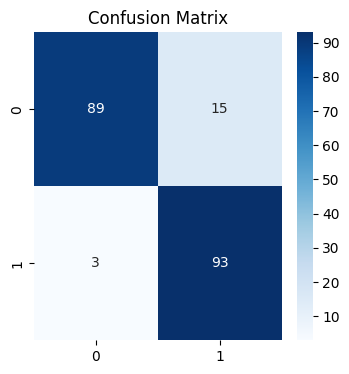

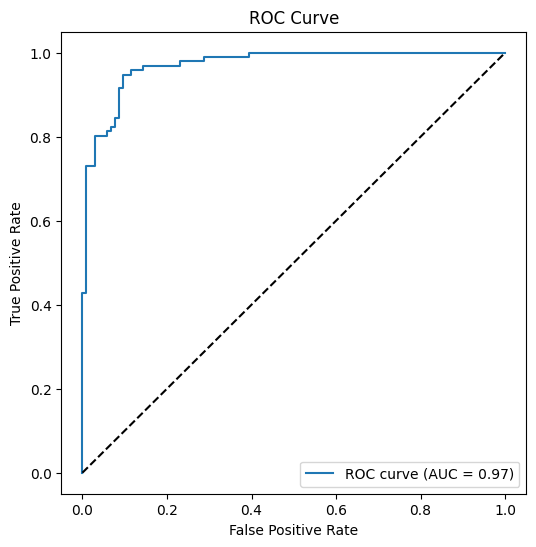


Linear SVM with PCA:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       104
           1       0.84      0.91      0.87        96

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



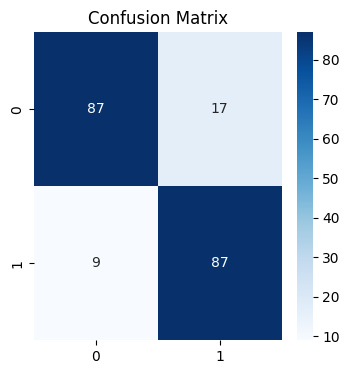

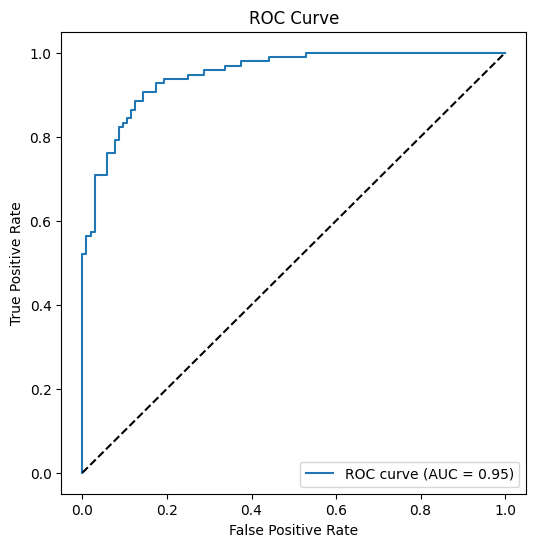

In [50]:
#SVM with Linear Kernel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Linear SVM without PCA
param_grid_linear = {'C': [0.1, 1, 10, 100]}
svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, n_jobs=-1)
svm_linear.fit(X_train, y_train)

# Linear SVM with PCA
svm_linear_pca = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, n_jobs=-1)
svm_linear_pca.fit(X_train_pca, y_train_pca)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

print("Linear SVM without PCA:")
evaluate_model(svm_linear.best_estimator_, X_test, y_test)

print("\nLinear SVM with PCA:")
evaluate_model(svm_linear_pca.best_estimator_, X_test_pca, y_test_pca)

RBF SVM without PCA:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       104
           1       0.96      0.99      0.97        96

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



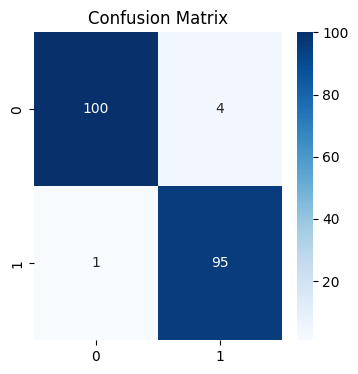

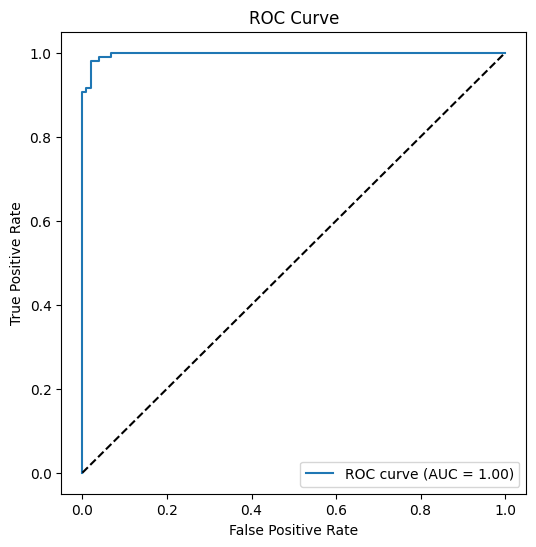


RBF SVM with PCA:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       104
           1       0.88      0.95      0.91        96

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



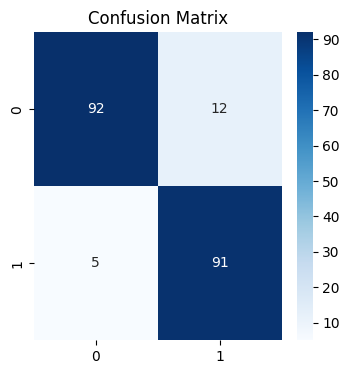

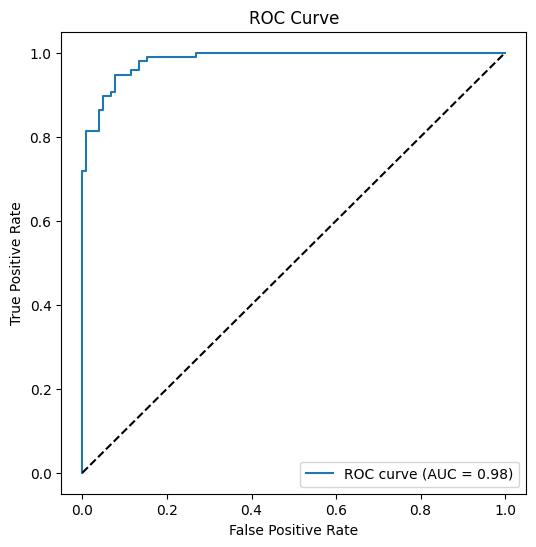

In [51]:
# RBF SVM without PCA
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale']}
svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, n_jobs=-1)
svm_rbf.fit(X_train, y_train)

# RBF SVM with PCA
svm_rbf_pca = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, n_jobs=-1)
svm_rbf_pca.fit(X_train_pca, y_train_pca)

# Evaluate models
print("RBF SVM without PCA:")
evaluate_model(svm_rbf.best_estimator_, X_test, y_test)

print("\nRBF SVM with PCA:")
evaluate_model(svm_rbf_pca.best_estimator_, X_test_pca, y_test_pca)

+------------------+---------------------+------------+
| Model            |   Training Time (s) |   Accuracy |
+==================+=====================+============+
| Linear SVM       |           0.0616939 |      0.915 |
+------------------+---------------------+------------+
| Linear SVM + PCA |           0.0965419 |      0.86  |
+------------------+---------------------+------------+
| RBF SVM          |           0.0426567 |      0.955 |
+------------------+---------------------+------------+
| RBF SVM + PCA    |           0.0367455 |      0.91  |
+------------------+---------------------+------------+


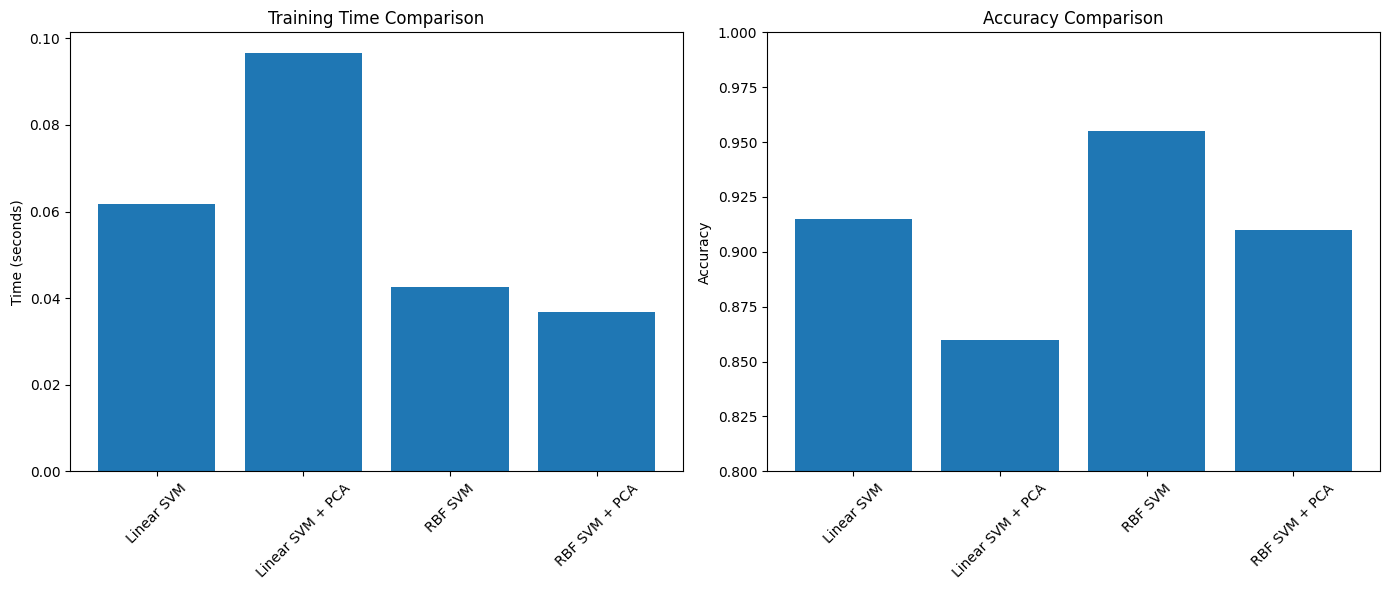

In [52]:
#Comparative Study
import time
from tabulate import tabulate

# Function to measure training time and accuracy
def measure_performance(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    accuracy = model.score(X_test, y_test)
    return training_time, accuracy

# Models to compare
models = {
    'Linear SVM': SVC(kernel='linear', C=1),
    'Linear SVM + PCA': SVC(kernel='linear', C=1),
    'RBF SVM': SVC(kernel='rbf', C=1, gamma='scale'),
    'RBF SVM + PCA': SVC(kernel='rbf', C=1, gamma='scale')
}

# Performance results
results = []

for name, model in models.items():
    if 'PCA' in name:
        train_time, acc = measure_performance(model, X_train_pca, y_train_pca, X_test_pca, y_test_pca)
    else:
        train_time, acc = measure_performance(model, X_train, y_train, X_test, y_test)
    results.append([name, train_time, acc])

# Display comparison table
print(tabulate(results, headers=['Model', 'Training Time (s)', 'Accuracy'], tablefmt='grid'))

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Training time comparison
ax1.bar([x[0] for x in results], [x[1] for x in results])
ax1.set_title('Training Time Comparison')
ax1.set_ylabel('Time (seconds)')
ax1.tick_params(axis='x', rotation=45)

# Accuracy comparison
ax2.bar([x[0] for x in results], [x[2] for x in results])
ax2.set_title('Accuracy Comparison')
ax2.set_ylabel('Accuracy')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()